#  Integrantes:
* Joaquin Machulsky, LU: 521/21
* Agustin Hernandez, LU: 37/20

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ej 1

In [ ]:
def jacobiMat(A, b, x0, s):
  
    n = np.shape(A)[0]

    x = np.copy(x0)
    M = np.diag(np.diag(A))
    N = A - M

    er = np.linalg.norm(A@x-b)/np.linalg.norm(b)#error
    k = 0
    while k < s and er>10**(-8):

        x = -(np.linalg.inv(M) @ N) @ x + np.linalg.inv(M) @ b
        er = np.linalg.norm(A@x-b)/np.linalg.norm(b)
        k += 1

    return(x, k)

# Ej 2

In [ ]:
A = np.array([[4,2,1],[1,4,1],[2,1,5]])
b = np.array([9,5,0])
x0 = np.array([1,1,1])

print(jacobiMat(A,b,x0,50))

(array([ 2.00000001,  1.        , -0.99999999]), 36)


Alcanza la convergencia en 36 pasos.

# Ej 3

In [ ]:
def metodoSOR(A, b, x0, w, s,):
  
    n = np.shape(A)[0]

    x = np.copy(x0)
    M = np.diag(np.diag(A)) + w * np.tril(A,-1)
    N = A*w- M

    error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
    k = 0

    while k < s and (error>10**(-8)):

        x = (-np.linalg.inv(M) @ N) @ x + np.linalg.inv(M) @ (w*b) 
        error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
        k += 1

    return(x, k)

# Ej 4

In [ ]:
print('Para w = 1: ',metodoSOR(A,b,x0,1,50))
print('Para w = 1.5: ',metodoSOR(A,b,x0,1.5,50))
print('Para w = 2.5: ',metodoSOR(A,b,x0,2.5,50))

Para w = 1:  (array([ 1.99999998,  1.        , -0.99999999]), 13)
Para w = 1.5:  (array([ 1.99999998,  0.99999999, -1.        ]), 43)
Para w = 2.5:  (array([-2.01349162e+11,  1.21088400e+11,  2.93734627e+11]), 50)


Para $w = 1$ y $w = 1.5$ alcanza la convergencia en 13 y 43 pasos respectivamente.

# Ej 5

In [ ]:
A = np.random.rand(5,5)

for i in range(4):
  A[i][i]=4

x0 = np.random.rand(5)
b = np.random.rand(5)

print(jacobiMat(A, b, x0, 100))

(array([ 0.10642382,  0.06355302, -0.00343816,  0.06759728,  0.17722179]), 60)


Como podemos observar, converge en 100 iteraciones o menos.

# Ej 6

In [ ]:
w_s = np.linspace(0,2,1001)
pasos = np.zeros(len(w_s))

for i in range(len(w_s)):
  pasos[i] = metodoSOR(A,b,x0,w_s[i],100)[1]

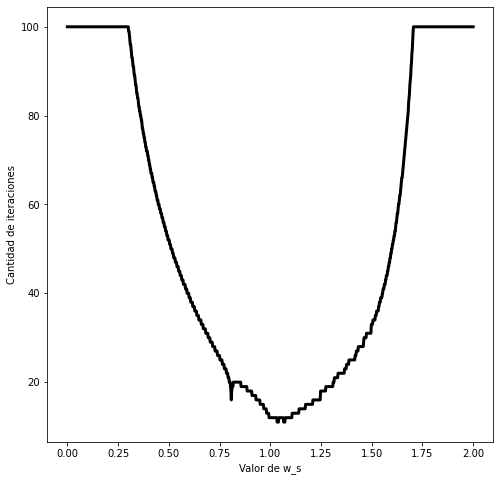

In [ ]:
#item B
plt.figure(figsize=(8,8))
plt.plot(w_s,pasos,'k',lw=3)
plt.ylabel('Cantidad de iteraciones')
plt.xlabel('Valor de w_s')
plt.show()

* Para w entre ~0.3 y ~1.6
* Para w entre ~0.9 y ~1.1 se observa que se obtuvieron las convergencias mas rapidas. 

# Ej 7

In [ ]:
def radioEspectralSOR(A,w):
  
  D = np.diag(np.diag(A))
  L = np.tril(A,-1)
  U = np.triu(A,1)
  M = np.linalg.inv(D+w*L)@(-(w*U+(w-1)*D))

  return(max(abs(np.linalg.eigvals(M))))

# Ej 8

In [ ]:
radios = np.zeros(len(w_s))

for i in range(len(w_s)):
  radios[i] = radioEspectralSOR(A,w_s[i])

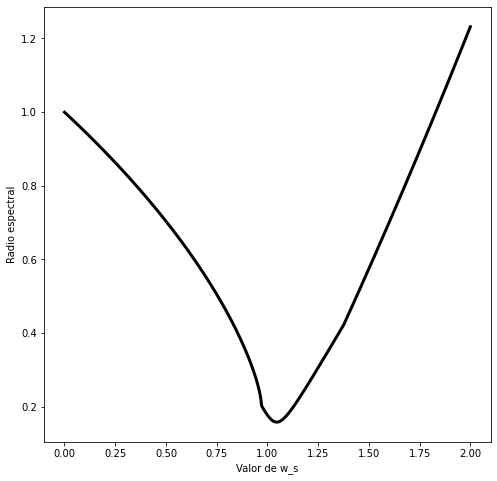

In [ ]:
#item B
plt.figure(figsize=(8,8))
plt.plot(w_s,radios,'k',lw=3)
plt.ylabel('Radio espectral')
plt.xlabel('Valor de w_s')
plt.show()

* Para los valores de w entre 0 ~1.8 el radio espectral es menor que 1
* Para w~1.05 se obtuvo el radio espectral mas chico

# Ej 9

In [ ]:
determinantes = np.zeros(len(w_s))

for i in range(len(w_s)):
  determinantes[i] = (1-w_s[i])**len(A)

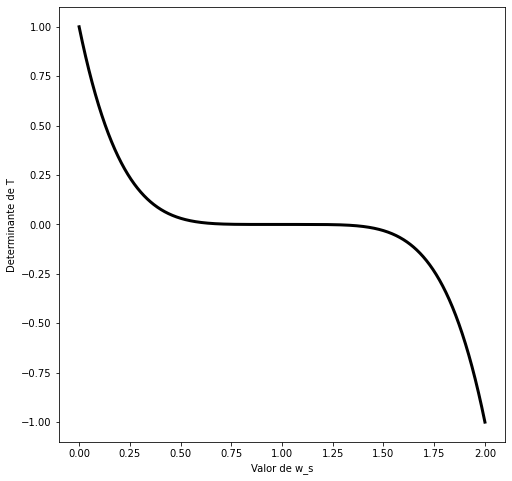

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(w_s,determinantes,'k',lw=3)
plt.ylabel('Determinante de T')
plt.xlabel('Valor de w_s')
plt.show()

* Para valores de w entre ~1.3 y 2 el determinante es menor que 1
* Para w = 2 se obtuvo el determinante mas chico